<a href="https://colab.research.google.com/github/kateh321/sciprog_21/blob/main/Math_model_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import cv2
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
################################################################################
import tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
################################################################################
from keras import layers,utils
from keras.datasets import cifar100
from keras.models import Sequential,load_model
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import Callback, EarlyStopping, ModelCheckpoint,ReduceLROnPlateau
from tensorflow.keras.models import Model
from tensorflow.keras.utils import load_img
from tensorflow.keras.layers import BatchNormalization, Dense, Dropout, Activation, Flatten,Conv2D,MaxPooling2D, MaxPool2D,Add, concatenate
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.utils import img_to_array
from numpy import expand_dims
################################################################################

In [2]:
#Pull data from Mendeley website
!wget -O PBC_dataset_normal_DIB.zip https://data.mendeley.com/public-files/datasets/snkd93bnjr/files/2fc38728-2ae7-4a62-a857-032af82334c3/file_downloaded

--2022-05-02 07:59:52--  https://data.mendeley.com/public-files/datasets/snkd93bnjr/files/2fc38728-2ae7-4a62-a857-032af82334c3/file_downloaded
Resolving data.mendeley.com (data.mendeley.com)... 162.159.133.86, 162.159.130.86
Connecting to data.mendeley.com (data.mendeley.com)|162.159.133.86|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com/5a5a3b1a-0b1d-46bc-bff2-0420599d351b [following]
--2022-05-02 07:59:52--  https://md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com/5a5a3b1a-0b1d-46bc-bff2-0420599d351b
Resolving md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com (md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com)... 52.218.93.88
Connecting to md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com (md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com)|52.218.93.88|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 281366219 (268M) [application

In [3]:
#Unzip folders
!unzip "/content/PBC_dataset_normal_DIB.zip" 

Streaming output truncated to the last 5000 lines.
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_292483.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_935950.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_890863.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_519370.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_215077.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_388154.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_968896.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_34345.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_349907.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_245683.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_785122.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_615525.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_714613.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_904757.jpg  
  inflating: PBC_dataset_n

In [4]:
#Install split-folders - must do for collab!
!pip install split-folders

In [5]:
import splitfolders
#Split data into train/val/test
splitfolders.ratio('PBC_dataset_normal_DIB', output="PBC_dataset_normal_DIB_pre", seed=777, ratio=(.70, .15, .15)) 

Copying files: 17092 files [00:02, 8187.37 files/s]


In [6]:
#paths for folders
data_path = 'PBC_dataset_normal_DIB_pre'
print("The Folders in Data Directory is:  ",os.listdir(data_path))

The Folders in Data Directory is:   ['train', 'test', 'val']


In [7]:
#Show number and name of classes in dataset
classes = os.listdir(data_path + "/train")
print(classes)
print("Classes Length: ",len(classes))

['erythroblast', 'basophil', 'lymphocyte', 'neutrophil', 'eosinophil', 'platelet', 'ig', 'monocyte']
Classes Length:  8


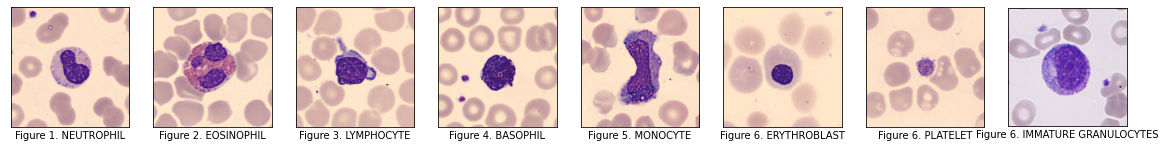

In [8]:
#Plotting sample images from dataset

x0 = plt.imread('PBC_dataset_normal_DIB/neutrophil/BNE_100878.jpg')
x1 = plt.imread('PBC_dataset_normal_DIB/eosinophil/EO_100213.jpg')
x2 = plt.imread('PBC_dataset_normal_DIB/lymphocyte/LY_461786.jpg')
x3 = plt.imread('PBC_dataset_normal_DIB/basophil/BA_100102.jpg')
x4 = plt.imread('PBC_dataset_normal_DIB/monocyte/MO_100695.jpg')
x5 = plt.imread('PBC_dataset_normal_DIB/erythroblast/ERB_508631.jpg')
x6 = plt.imread('PBC_dataset_normal_DIB/platelet/PLATELET_548204.jpg')
x7 = plt.imread('PBC_dataset_normal_DIB/ig/IG_101958.jpg')


fig, ax=plt.subplots(1,8)
fig.set_figheight(20)
fig.set_figwidth(20)


ax[0].imshow(x0)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_xlabel("Figure 1. NEUTROPHIL")

ax[1].imshow(x1)
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_xlabel("Figure 2. EOSINOPHIL")


ax[2].imshow(x2)
ax[2].set_xticks([])
ax[2].set_yticks([])
ax[2].set_xlabel("Figure 3. LYMPHOCYTE")

ax[3].imshow(x3)
ax[3].set_xticks([])
ax[3].set_yticks([])
ax[3].set_xlabel("Figure 4. BASOPHIL")

ax[4].imshow(x4)
ax[4].set_xticks([])
ax[4].set_yticks([])
ax[4].set_xlabel("Figure 5. MONOCYTE")

ax[5].imshow(x5)
ax[5].set_xticks([])
ax[5].set_yticks([])
ax[5].set_xlabel("Figure 6. ERYTHROBLAST")

ax[6].imshow(x6)
ax[6].set_xticks([])
ax[6].set_yticks([])
ax[6].set_xlabel("Figure 6. PLATELET")

ax[7].imshow(x7)
ax[7].set_xticks([])
ax[7].set_yticks([])
ax[7].set_xlabel("Figure 6. IMMATURE GRANULOCYTES")

fig.canvas.set_window_title("White blood cell types")

In [9]:
#Data Augmentation and creation of 
train_datagen = ImageDataGenerator(horizontal_flip=True, 
                                   vertical_flip=True,
                                   rotation_range=90,
                
                                   )
val_datagen   = ImageDataGenerator()

train_dataset = train_datagen.flow_from_directory(
    '/content/PBC_dataset_normal_DIB_pre/train',
    seed=777,
    target_size=(128, 128),
    batch_size=64,
    shuffle=True,
    class_mode = 'categorical')

val_dataset = val_datagen.flow_from_directory(
    '/content/PBC_dataset_normal_DIB_pre/val',
    seed=777,
    target_size=(128, 128),
    batch_size=64,
    shuffle=True,
    class_mode = 'categorical')

Found 11959 images belonging to 8 classes.
Found 2561 images belonging to 8 classes.


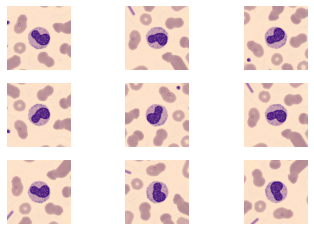

In [10]:

img = load_img('PBC_dataset_normal_DIB/neutrophil/BNE_100878.jpg')
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(
                             horizontal_flip=True,
                             vertical_flip=True,
                             rotation_range=90
                             )
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
  
	# plot raw pixel data
	plt.axis('off')
	plt.imshow(image)


# show the figure
plt.show()

In [11]:
class_dict = train_dataset.class_indices
print(class_dict)

x = type (train_dataset.num_classes)
print(x)
from collections import Counter

counter = Counter(train_dataset.classes)
counter1 = Counter(val_dataset.classes)
#counter2 = Counter(test_dataset.classes)

print(counter.items())
print(counter1.items())
#print(counter2.items())




{'basophil': 0, 'eosinophil': 1, 'erythroblast': 2, 'ig': 3, 'lymphocyte': 4, 'monocyte': 5, 'neutrophil': 6, 'platelet': 7}
<class 'int'>
dict_items([(0, 852), (1, 2181), (2, 1085), (3, 2026), (4, 849), (5, 993), (6, 2330), (7, 1643)])
dict_items([(0, 182), (1, 467), (2, 232), (3, 434), (4, 182), (5, 213), (6, 499), (7, 352)])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count')

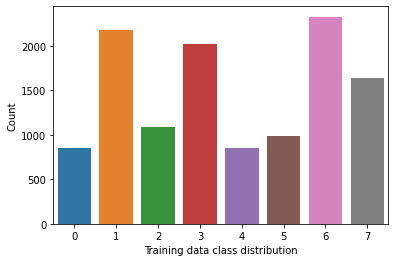

In [12]:
#Show class distrubution in training data
c =sns.countplot(train_dataset.classes)
c.set_xlabel('Training data class distribution')
c.set_ylabel('Count')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count')

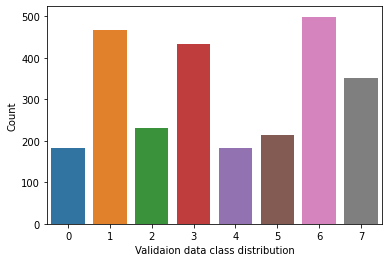

In [13]:
k=sns.countplot(val_dataset.classes)
k.set_xlabel('Validaion data class distribution')
k.set_ylabel('Count')


In [14]:
#model 

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(128,128,3),strides=1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(8, activation='softmax'))



In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 30, 30, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        1

In [16]:
#Compile model
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
#Reduce learning rate when validation accuracy not improving
learn_control = ReduceLROnPlateau(monitor='val_accuracy', patience=5,
                                  verbose=1,factor=0.2, min_lr=1e-9)

In [18]:
#Save model/weights in checkpoint file 
from keras.callbacks import Callback, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
filepath="modelbest.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')


In [19]:
#Fit model
model_fit = model.fit(train_dataset,
                      steps_per_epoch = 100,  
                      validation_data=val_dataset,
                      epochs=50,
                      validation_steps = 28,
                      callbacks = [learn_control, checkpoint]
                      )

#Epochs

Epoch 1/50
100/100 [==============================] - ETA: 0s - loss: 3.8833 - accuracy: 0.2323
Epoch 1: val_accuracy improved from -inf to 0.45536, saving model to modelbest.hdf5
100/100 [==============================] - 49s 367ms/step - loss: 3.8833 - accuracy: 0.2323 - val_loss: 1.6062 - val_accuracy: 0.4554 - lr: 0.0010
Epoch 2/50
100/100 [==============================] - ETA: 0s - loss: 1.2896 - accuracy: 0.5322
Epoch 2: val_accuracy improved from 0.45536 to 0.67634, saving model to modelbest.hdf5
100/100 [==============================] - 37s 367ms/step - loss: 1.2896 - accuracy: 0.5322 - val_loss: 0.9003 - val_accuracy: 0.6763 - lr: 0.0010
Epoch 3/50
100/100 [==============================] - ETA: 0s - loss: 0.9369 - accuracy: 0.6511
Epoch 3: val_accuracy improved from 0.67634 to 0.78404, saving model to modelbest.hdf5
100/100 [==============================] - 37s 368ms/step - loss: 0.9369 - accuracy: 0.6511 - val_loss: 0.6880 - val_accuracy: 0.7840 - lr: 0.0010
Epoch 4/50
10

In [20]:
 #keras.backend.clear_session() # Use this function to clear any previously stored model data

In [34]:
# Function for plotting

def show_final_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('Loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('Accuracy')
    ax[1].plot(history.epoch, history.history["accuracy"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()

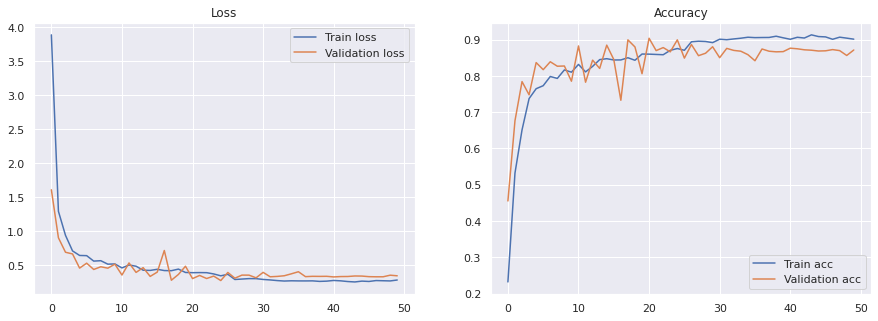

In [35]:
#Show learning curve
show_final_history(model_fit) 

In [36]:
#Create and augment test data
test_datagen   = ImageDataGenerator()
test_dataset = test_datagen.flow_from_directory(
    '/content/PBC_dataset_normal_DIB_pre/test',
    seed=777,
    target_size=(128, 128),
    batch_size=64,
    class_mode = 'categorical')

Found 2572 images belonging to 8 classes.


In [37]:
#Calculate test steps
test_steps = test_dataset.n // test_dataset.batch_size
print(test_steps)

40


In [38]:
#Evaluate test model performance
valid_loss, valid_accuracy = model.evaluate(val_dataset)
test_loss, test_accuracy   = model.evaluate(test_dataset)

41/41 [==============================] - 5s 128ms/step - loss: 0.3598 - accuracy: 0.8542


In [39]:
print('Validation Accuracy: ', round((valid_accuracy * 100), 1), "%")
print('Test Accuracy: ', round((test_accuracy * 100), 1), "%")
print(" ")
print('Validation Loss: ', round(valid_loss, 1))
print('Test Loss: ', round(test_loss, 1))

Validation Accuracy:  86.6 %
Test Accuracy:  85.4 %
 
Validation Loss:  0.3
Test Loss:  0.4


In [40]:
test_dataset.reset()
X_test_, y_test_true = [],[] 
for i in range(test_steps):
    X , y = next(test_dataset)
    X_test_.extend(X) 
    y_test_true.extend(y)

In [41]:
#Convert to numpy arrays
X_test_    = np.array(X_test_)
y_test_true= np.array(y_test_true)
print(X_test_.shape, y_test_true.shape)

(2560, 128, 128, 3) (2560, 8)


In [42]:
#Predict using model2
y_pred = model.predict(X_test_)


In [43]:
#Setting figure size for confusion matrix
sns.set(rc={'figure.figsize':(11.7,8.27)})

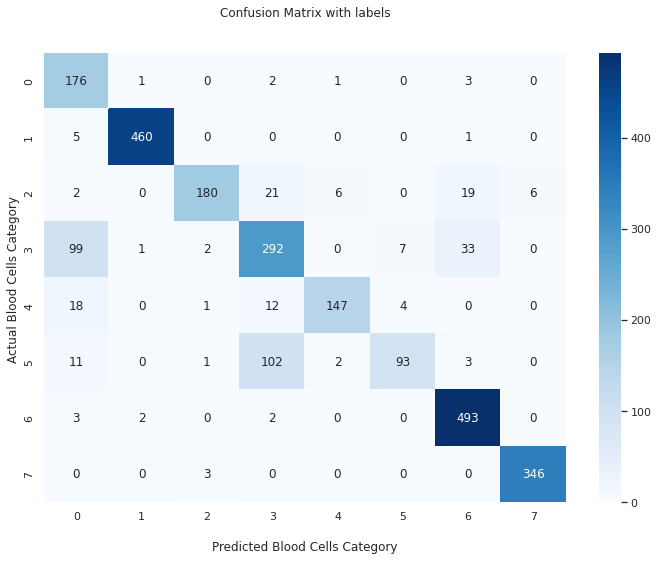

In [44]:
#Plot confusion matrix
confusionMatrix = confusion_matrix(np.argmax(y_test_true, axis=1), np.argmax(y_pred, axis=1))

ax = sns.heatmap(confusionMatrix, annot=True, cmap='Blues',fmt='g')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Blood Cells Category')
ax.set_ylabel('Actual Blood Cells Category ');

# ax.xaxis.set_ticklabels(classes)
# ax.yaxis.set_ticklabels(classes)

## Display the visualization of the Confusion Matrix.
plt.show()

In [45]:
#Print Classification report
print(classification_report(np.argmax(y_test_true, axis=1), np.argmax(y_pred, axis=1),zero_division=0))

              precision    recall  f1-score   support

           0       0.56      0.96      0.71       183
           1       0.99      0.99      0.99       466
           2       0.96      0.77      0.86       234
           3       0.68      0.67      0.68       434
           4       0.94      0.81      0.87       182
           5       0.89      0.44      0.59       212
           6       0.89      0.99      0.94       500
           7       0.98      0.99      0.99       349

    accuracy                           0.85      2560
   macro avg       0.86      0.83      0.83      2560
weighted avg       0.87      0.85      0.85      2560



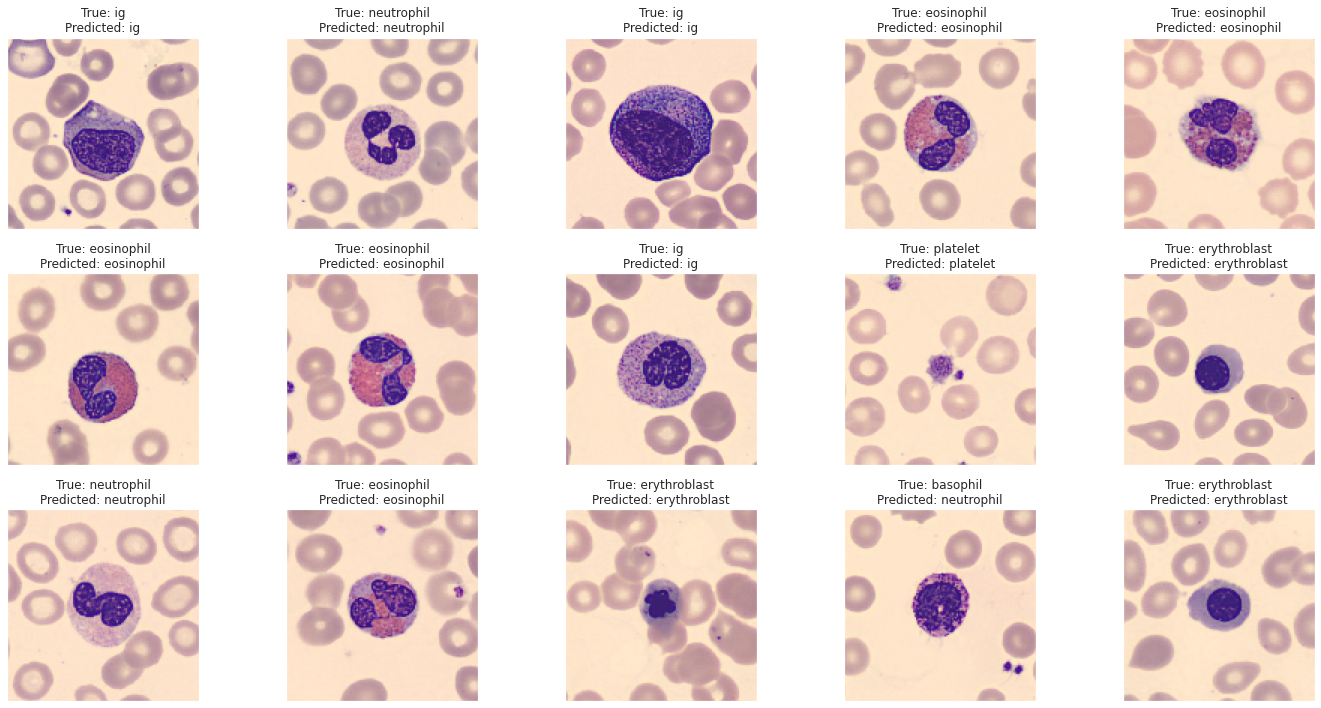

In [46]:
#Plot sample of predicted classes 
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
  ax.imshow((X_test_[i]).astype('uint8'))
  ax.set_title(f"True: {list(test_dataset.class_indices.keys())[list(test_dataset.class_indices.values()).index(np.argmax(y_test_true, axis=1)[i])]}\nPredicted: {list(test_dataset.class_indices.keys())[list(test_dataset.class_indices.values()).index(np.argmax(y_pred, axis=1)[i])]}")
plt.tight_layout()
plt.show();